In [ ]:
# Team members: Agnar Martin Bjørnstad, Sebastian Aas

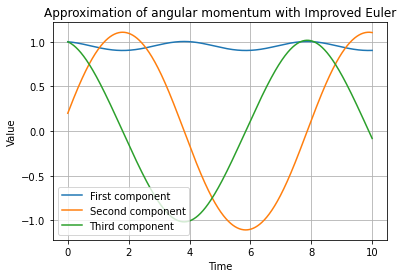

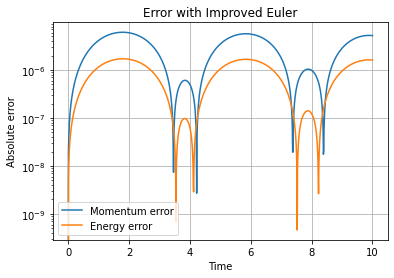

In [74]:
# Task 1A

import numpy as np
import matplotlib.pyplot as plt


def improved_euler(m_0: np.ndarray, t_inv: np.ndarray, N: int, h: float) -> np.ndarray:
    m_n = m_0
    m = [m_n]
    for n in range(N - 1):
        m_n_half = m_n + (h / 2) * (np.cross(m_n, (t_inv @ m_n)))
        m_n = m_n + h * np.cross(m_n_half, (t_inv @ m_n_half))
        m.append(m_n)
    return np.array(m, dtype=np.float64)


def momentum_error(m_0: np.ndarray, m_n: np.ndarray) -> np.float64:
    return np.abs(m_n.T @ m_n - m_0.T @ m_0)


def energy_error(m_0: np.ndarray, m_n: np.ndarray, t_inv: np.ndarray) -> np.float64:
    return np.abs(0.5 * m_n.T @ (t_inv @ m_n) - 0.5 * m_0.T @ (t_inv @ m_0))


m_0 = np.asarray([1, 0.2, 1], dtype=np.float64)
t_inv = np.linalg.inv(np.array([[1, 0, 0], [0, 4, 0], [0, 0, 9]]))
start, end = 0, 10
N = 1000
h = (end - start) / N

sol = improved_euler(m_0, t_inv, N, h)
ts = np.linspace(0, 10, num=N)

plt.plot(ts, sol[:, 0], label='First component')
plt.plot(ts, sol[:, 1], label='Second component')
plt.plot(ts, sol[:, 2], label='Third component')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Approximation of angular momentum with Improved Euler")
plt.show()

momentum_errors = np.array([momentum_error(m_0, x) for x in sol])
plt.plot(ts, momentum_errors, label='Momentum error')
energy_errors = np.array([energy_error(m_0, x, t_inv) for x in sol])
plt.plot(ts, energy_errors, label='Energy error')
plt.legend(loc='lower left')
plt.semilogy()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Absolute error")
plt.title("Error with Improved Euler")
plt.show()

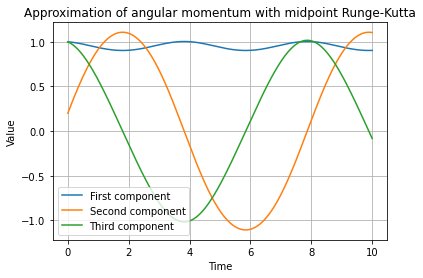

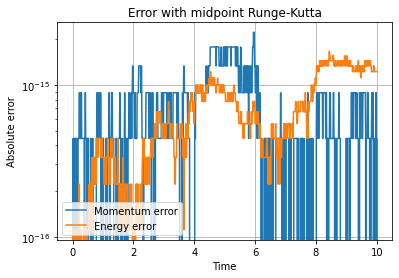

In [75]:
# Task 1B

from numpy.linalg import norm


def fixed_point_iteration(x_0: np.ndarray, func, tol: np.float64, max_iter: np.int64) -> np.ndarray:
    x_n = x_0
    for iter in range(max_iter):
        next_x = func(x_n)
        if norm(next_x - x_n) <= tol:
            x_n = next_x
            break
        x_n = next_x
    return x_n


def runge_kutta(m_0: np.ndarray, t_inv: np.ndarray, N: int, h: float, tol:float=1e-15) -> np.ndarray:
    m_n = m_0
    m = [m_n]
    f_n_half = lambda x: m_n + (h / 2) * (np.cross(x, (t_inv @ x)))
    for n in range(N - 1):
        m_n_half = fixed_point_iteration(m_n, f_n_half, np.float64(tol), 100)
        #m_n_half = m_n + (h / 2) * (np.cross(m_n, (t_inv @ m_n)))
        m_n = m_n + h * np.cross(m_n_half, (t_inv @ m_n_half))
        m.append(m_n)
    return np.array(m, dtype=np.float64)


sol = runge_kutta(m_0, t_inv, N, h)

plt.plot(ts, sol[:, 0], label='First component')
plt.plot(ts, sol[:, 1], label='Second component')
plt.plot(ts, sol[:, 2], label='Third component')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Approximation of angular momentum with midpoint Runge-Kutta")
plt.show()

momentum_errors = np.array([momentum_error(m_0, x) for x in sol])
plt.plot(ts, momentum_errors, label='Momentum error')
energy_errors = np.array([energy_error(m_0, x, t_inv) for x in sol])
plt.plot(ts, energy_errors, label='Energy error')
plt.legend(loc='lower left')
plt.semilogy()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Absolute error")
plt.title("Error with midpoint Runge-Kutta")
plt.show()

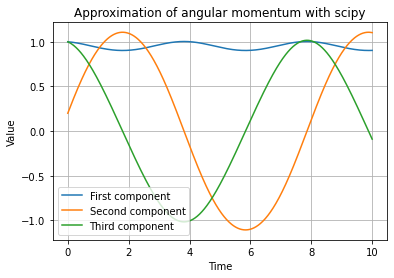

In [68]:
# Task 1C

from scipy.integrate import solve_ivp

# 1.

fun = lambda t, x: np.cross(x, t_inv @ x)
sol_ivp = solve_ivp(fun, (start, end), m_0, atol=1e-13, rtol=1e-13)
ts = sol_ivp.t
sol = sol_ivp.y.T

plt.plot(ts, sol[:, 0], label='First component')
plt.plot(ts, sol[:, 1], label='Second component')
plt.plot(ts, sol[:, 2], label='Third component')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Approximation of angular momentum with scipy")
plt.show()

C:\Users\sebas\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


Slope:  1.9895767815855068


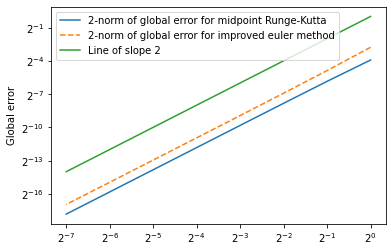

[2.1007784610644635, 2.040217198201211, 2.0181911499169014, 2.0087559398460257, 2.0043126868079355, 2.00214259323684, 2.0010681874521303]
[1.9239694387682873, 1.9799425259470076, 1.9949116401832996, 1.9987231290229601, 1.9996804809018047, 1.9999201015342174, 1.9999800244837043]


In [69]:
# 2. 

m_0 = np.asarray([1, 0.2, 1], dtype=np.float64)
t_inv = np.linalg.inv(np.array([[1, 0, 0], [0, 4, 0], [0, 0, 9]]))
start, end = 0, 2
k = 8
N = [2**i for i in range(1,k+1)]
h_values = [end / n for n in N]
intervals = [np.linspace(start, end, num=n) for n in N]

fun = lambda t, x: np.cross(x, t_inv @ x)
sol_ivp_object = solve_ivp(fun, (start, end), m_0, atol=1e-15, rtol=1e-15)
ts_ivp = sol_ivp_object.t
sol_ivp = sol_ivp_object.y.T

errors_midpoint = []
errors_euler = []
for n, h in zip(N, h_values):
    sol_midpoint = runge_kutta(m_0, t_inv, n+1, h)
    sol_improved_euler = improved_euler(m_0, t_inv, n+1, h)
    
    global_error_midpoint = norm(sol_ivp[-1] - sol_midpoint[-1], 2)
    global_error_euler = norm(sol_ivp[-1] - sol_improved_euler[-1] , 2)
    errors_midpoint.append(global_error_midpoint)
    errors_euler.append(global_error_euler)
    
order_of_midpoint = []    
for i in range(len(errors_midpoint)-1):
    order_of_midpoint.append(np.log2(errors_midpoint[i] / errors_midpoint[i+1]))
    
order_of_euler = []    
for i in range(len(errors_euler)-1):
    order_of_euler.append(np.log2(errors_euler[i] / errors_euler[i+1]))
    
slope, intercept = np.polyfit(np.log2(h_values), np.log2(errors_midpoint), 1)
print("Slope: ", slope)
plt.loglog(h_values, errors_midpoint,base=2, label="2-norm of global error for midpoint Runge-Kutta")
plt.loglog(h_values, errors_euler, base=2, linestyle="dashed", label="2-norm of global error for improved euler method")
plt.loglog(h_values, [h**2 for h in h_values], base=2, label="Line of slope 2")
plt.ylabel("Global error")
plt.legend()
plt.show()

# We can also see the order of the methods by dividing e_i by e_i+1 and taking the log2. 
#This will provide us the order + small error.
# As we can see, the order of both methods is close to 2 as expected.
print(order_of_euler)
print(order_of_midpoint)

In [77]:
# Task 1D
import time

m_0 = np.asarray([1, 0.2, 1], dtype=np.float64)
t_inv = np.linalg.inv(np.array([[1, 0, 0], [0, 4, 0], [0, 0, 9]]))
start, end = 0, 10000
N = 100000
h = (end - start) / N
ts = np.linspace(start, end, num=N)

def plot_error(m_0, t_inv, N, h, sol, interval, name):
    momentum_errors = np.array([momentum_error(m_0, x) for x in sol])
    plt.plot(interval, momentum_errors, label='Momentum error')
    energy_errors = np.array([energy_error(m_0, x, t_inv) for x in sol])
    plt.plot(interval, energy_errors, label='Energy error')
    plt.legend(loc='lower left')
    plt.semilogy()
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Absolute error")
    plt.title("Error with {}".format(name))
    plt.show()

fun = lambda t, x: np.cross(x, t_inv @ x)

The midpoint Runge-Kutta method with tolerance 1e-15 used  59.684550523757935  seconds


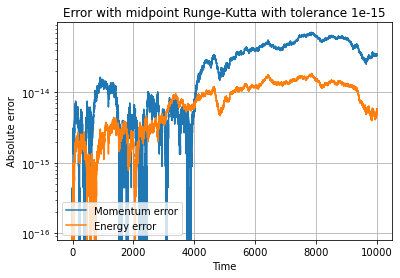

In [78]:
t0 = time.time()
sol_midpoint = runge_kutta(m_0, t_inv, N, h)
print("The midpoint Runge-Kutta method with tolerance 1e-15 used ", time.time() - t0, " seconds")
plot_error(m_0, t_inv, N, h, sol_midpoint, ts, "midpoint Runge-Kutta with tolerance 1e-15")

The midpoint Runge-Kutta method with tolerance 1e-7 used  31.019975423812866  seconds


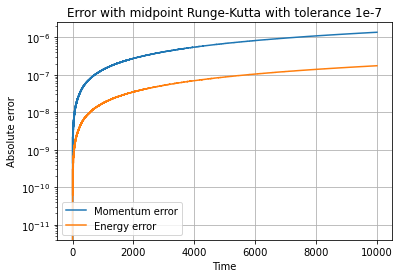

In [79]:
t0 = time.time()
sol_midpoint = runge_kutta(m_0, t_inv, N, h, tol=1e-7)
print("The midpoint Runge-Kutta method with tolerance 1e-7 used ", time.time() - t0, " seconds")
plot_error(m_0, t_inv, N, h, sol_midpoint, ts, "midpoint Runge-Kutta with tolerance 1e-7")

The improved Euler method used  7.436923980712891  seconds


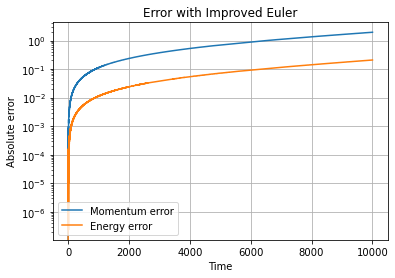

In [80]:
t0 = time.time()
sol_improved_euler = improved_euler(m_0, t_inv, N, h)
print("The improved Euler method used ", time.time() - t0, " seconds")
plot_error(m_0, t_inv, N, h, sol_improved_euler, ts, "Improved Euler")

The solve ivp method with toleance 1e-7 used  13.170877933502197  seconds


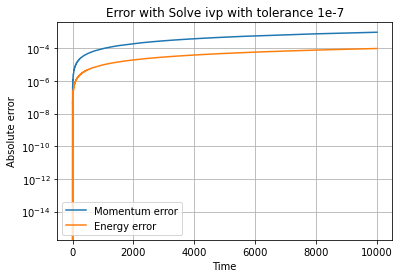

In [81]:
t0 = time.time()
sol_ivp_object = solve_ivp(fun, (start, end), m_0, atol=1e-7, rtol=1e-7)
print("The solve ivp method with toleance 1e-7 used ", time.time() - t0, " seconds")
sol_ivp = sol_ivp_object.y.T
ts_ivp = sol_ivp_object.t
plot_error(m_0, t_inv, N, h, sol_ivp, ts_ivp, "Solve ivp with tolerance 1e-7")

C:\Users\sebas\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


The solve ivp method with toleance 1e-15 used  381.6510787010193  seconds


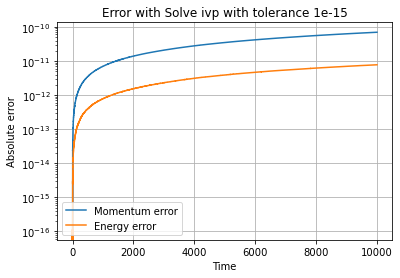

In [82]:
t0 = time.time()
sol_ivp_object_2 = solve_ivp(fun, (start, end), m_0, atol=1e-15, rtol=1e-15)
print("The solve ivp method with toleance 1e-15 used ", time.time() - t0, " seconds")
sol_ivp_2 = sol_ivp_object_2.y.T
ts_ivp_2 = sol_ivp_object_2.t

plot_error(m_0, t_inv, N, h, sol_ivp_2, ts_ivp_2, "Solve ivp with tolerance 1e-15")

In [ ]:
"""
What do you observe?
- The error of all methods are increasing with the number of timesteps, which is expected.
- The improved Euler method is the fastest, but has worst error.
- Midpoint Runge-Kutta is much more accurate than the improved Euler method.
- Midpoint Runge-Kutta uses double as long when run with tolerance 1e-15 than with 1e-7, but
    the error is much better as well.
- We can see that the solve ivp method with tolerance 1e-15 has a much lower absolute error,
than when solved with 1e-7 tolerance, but it takes almost 30 times as long to calculate. 

Conclusion
From this we can conclude that the midpoint Runge-Kutta method is the most accurate.
It is not the fastest, but is significantly faster than the solve ivp method, which are a 5th(4th)
order Runge-Kutta method. The slowest method was the solve ivp with tolerance 1e-15, and the 
fastest method was the improved Euler method. 
"""


In [83]:
np.random.seed(2)
m_0= np.random.rand(3)
m_0= m_0/np.linalg.norm(m_0,2)
t_inv = np.linalg.inv(np.array([[1, 0, 0], [0, 4, 0], [0, 0, 9]]))
start, end = 0, 100
N = 1000
h = (end - start) / N
ts = np.linspace(start, end, num=N)

sol_midpoint = runge_kutta(m_0, t_inv, N, h)
sol_improved_euler = improved_euler(m_0, t_inv, N, h)

fun = lambda t, x: np.cross(x, t_inv @ x)
sol_ivp_object = solve_ivp(fun, (start, end), m_0, atol=1e-7, rtol=1e-13)
sol_ivp = sol_ivp_object.y.T
ts_ivp = sol_ivp_object.t

def unzip(array):
    x = [i[0] for i in array]
    y = [i[1] for i in array]
    z = [i[2] for i in array]
    return x,y,z

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

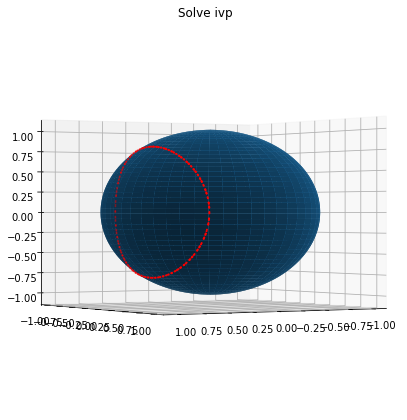

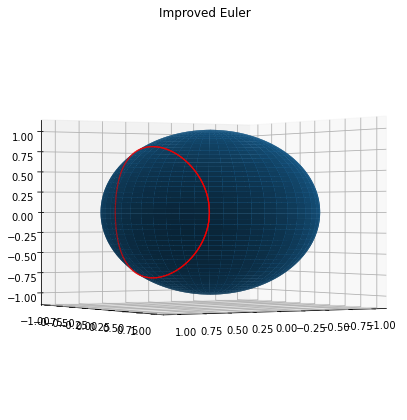

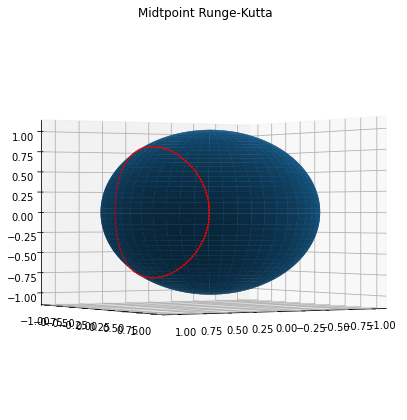

In [84]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111,projection="3d")
ax.set_title("Solve ivp")
ax.plot_surface(x,y,z)
ax.scatter(*unzip(sol_ivp), c="red", s=1)
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(0, 59)
plt.show()


fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111,projection="3d")
ax.set_title("Improved Euler")
ax.scatter(*unzip(sol_improved_euler), c="red", s=0.1 )
ax.plot_surface(x,y,z)
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(0, 59)
plt.show()

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111,projection="3d")
ax.set_title("Midtpoint Runge-Kutta")
ax.scatter(*unzip(sol_midpoint), c="red", s=0.1)
ax.plot_surface(x,y,z)
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(0, 59)
plt.show()

SyntaxError: invalid syntax (<ipython-input-72-857374a0875c>, line 1)